In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
from os import *
import re
import imutils
from PIL import Image
import tqdm

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]


In [3]:
def crop(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

In [4]:
def find_cut(path_img, via_img, well_to_use, save_path):
    
    images = []

    for _,_, filenames in os.walk(path_img):
        for filename in sorted(filenames, key = natural_keys):
            if well_to_use in filename:

                im=cv2.imread(path_img + filename,0)

                imarray = np.array(im)


                images.append(imarray)
    s_crop = []

    for ix,_ in enumerate(images):
        s = (crop(images[ix],256,256))
        for idx,_ in enumerate(s):

            imarray = np.array(s[idx])
            
            im = Image.fromarray(imarray)

            im.save(save_path.format(via_img, well_to_use,idx, ix))

            s_crop.append(imarray)
    
    return(s_crop)

In [ ]:
path = '/home/jovyan/DATA_MASTER_PROJECT/IMG_A549_high_con/full_size_ADR/'

In [5]:
via = '/home/jovyan/DATA_MASTER_PROJECT/IMG_A549_high_con/ADR_tile/'
#directory = os.mkdir(via) 

In [ ]:
name_well = []
for di,dr,f in os.walk(path):
    for i in f:
        name_well.append(i.split(' ')[1].split(' ')[0])

In [ ]:
wells = sorted(list(set(name_well)))
len(wells)

In [ ]:
final_count = []

for i in tqdm.tqdm(wells):
    count = find_cut(path, via, i,'{0}/adr_{1}_id_{2}_time_{3}.tiff' )
    final_count.append(count)

In [8]:
tot = []
for _,_,i in os.walk(via):
    for j in i:
        tot.append(j)
        

In [9]:
tot[0]

'adr_B11-1_id_2_time_6.tiff'

In [10]:
images = []
for i in tot:
    im=cv2.imread(via + i, 1)
    imarray = np.array(im)
    images.append(imarray)
    

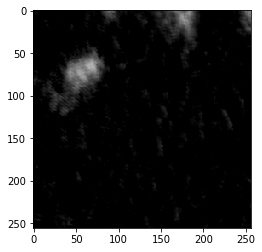

In [14]:
plt.imshow(images[10])

In [15]:
import sys

sys.getsizeof(images[30])

196736

In [16]:
images[0].shape

(256, 256, 3)

In [17]:
def resize(x):
    rescaled = []

    for i in x:

        scale_percent = 400 # percent of original size
        width = int(i.shape[1] / (scale_percent / 100))
        height = int(i.shape[0] / (scale_percent / 100))
        dim = (width, height)
        resized = cv2.resize(i, dim, interpolation = cv2.INTER_LANCZOS4)
        rescaled.append(resized)

    x_orig = np.reshape( rescaled, (len( rescaled), resized.shape[1], resized.shape[1], 3))

    return x_orig

In [18]:
e = resize(images)

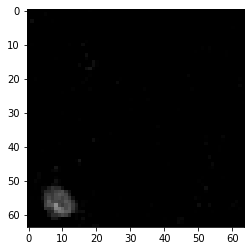

In [19]:
plt.imshow(e[0])

In [20]:
e[0].shape

(64, 64, 3)

In [21]:
sys.getsizeof(e[0])

128

In [22]:
128*100000

12800000

In [23]:
196736*70000

13771520000